In [61]:
# get data
file = open("clean_denver_analysis_5_7pm_fire_12_30_21.txt", mode='r', encoding='utf-8-sig')
text = file.read()
file.close()

In [62]:
text = text.replace(',', '').replace('>','').replace('.','').replace('\n','').replace('’',"'").replace('!','').replace('?','').replace('%','').replace(')','').replace('(','').replace('_','').replace(':','')
text = text.lower()

clean_text = ''
# remove numbers
for i in text:
    if not i.isdigit():
      clean_text += i
    
clean_text_list = clean_text.split(' ')
len(clean_text_list)

21772

In [64]:
# https://en.wikipedia.org/wiki/Glossary_of_climate_change
climate_change_related_words = [
    'adaptation',
    'all-time',
    'arctic shrinkage',
    'carbon',
    'carbon dioxide',
    'carbon footprint',
    'carbon offset',
    'carbon tax',
    'celsius',
    'climate',
    'climate change',
    'climate crisis',
    'climate justice',
    'crisis',
    'degree',
    'ecosystem',
    'energy',
    'environmental',
    'extreme weather event',
    'fossil fuel',
    'glacial',
    'global',
    'global climate',
    'global cooling',
    'global warming',
    'global warming controversy',
    'global warming denial',
    'greenhouse',
    'greenhouse debt',
    'greenhouse effect',
    'greenhouse gas',
    'greenland ice sheet',
    'historic',
    'historical',
    'historical temperature record',
    'history',
    'hottest',
    'ice sheet',
    'life-threatening',
    'megadrought',
    'meteorologist',
    'meteorology',
    'mitigation',
    'natural',
    'nitrous oxide',
    'ozone',
    'planet',
    'policies',
    'policy',
    'pollution',
    'record',
    'record breaking',
    'record-setting',
    'renewable resource',
    'report',
    'reversable',
    'reverse',
    'science',
    'scientist',
    'sea ice',
    'sea level',
    'sea-level',
    'sea-level rise',
    'severe',
    'solar',
    'unprecedented',
    'warm',
    'warmest',
    'warming'
]
climate_change_related_words.sort()

In [66]:
# build large stopword list

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

from wordcloud import STOPWORDS
regions = ['chicago', 'california', 'denver', 'boulder','city', 'kansas', 'area', 'indiana', 'illinois', 'colorado']
covid_related = ['omicron', 'delta', 'vaccine', 'mask', 'mandate', 'school', 'covid', 'decline']
time_related = ['tonight', "tonight's", 'now', 'saturday', 'tomorrow', 'yesterday']
names = ['erica', 'alan', 'whit', 'christian', 'russell', 'rob', 'jeff', 'mike', 'jonathan', 'jeremy']
random_words = ['pm', 'people', 'murder', 'watching', 'saying', 'go', 'one', 'thank', 'you', 'two', 'live', 'want', 'saw', 'see', 'let', 'even', 'may', 'side', 'able', 'trying', 'near', 'said', 'going', 'us', 'coming', 'reporter', '']
more_stop_words = [i.lower() for i in STOPWORDS]
final_stop_words = list(stop_words) + more_stop_words + regions + random_words + time_related + names + covid_related
final_stop_words = set(final_stop_words)
len(final_stop_words)

[nltk_data] Downloading package stopwords to /Users/loren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


286

In [67]:
# remove stopwords
filtered_clean_text_list = []

for word in clean_text_list:
    if word in final_stop_words:
        continue
    # don't care about numbers
    elif word.isdigit():
        continue
    # don't care about timestamps
    elif word.startswith('pm'):
        continue
    # don't care about timestamps
    elif '20211230' in word:
        continue
    # don't care about timestamps
    elif 'households' in word:
        continue
    # if history/historical/historic
    elif 'histor' in word:
        filtered_clean_text_list.append('historic')
    # if flames
    elif 'flame' in word:
        filtered_clean_text_list.append('fire')
    # remove -- from places where dates used to be
    elif '--' in word:
        filtered_clean_text_list.append(word.replace('--',''))
    else:
        filtered_clean_text_list.append(word)
        
len(filtered_clean_text_list) # 9582

9582

<FreqDist with 1571 samples and 9627 outcomes>


[nltk_data] Downloading package punkt to /Users/loren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


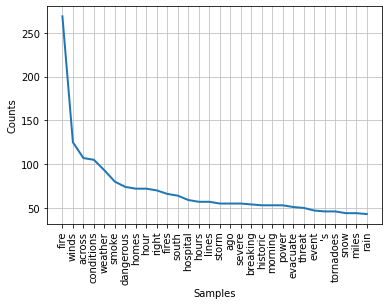

In [71]:
# tokenize filtered word list for frequency distribution
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# back to text
filtered_clean_text = " ".join(i for i in filtered_clean_text_list)

# tokenize text
tokenized_text = word_tokenize(filtered_clean_text)

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_text)
print(fdist)

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [72]:
#Lexicon Normalization
# Lemmatization -- distill to root words

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

lemma_list = []
for word, tag in nltk.pos_tag(filtered_clean_text_list):
    wntag = tag[0].lower()
    wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
    if not wntag:
        lemma = word
    else:
        lemma = lem.lemmatize(word, pos=wntag)
    lemma_list.append(lemma)
len(lemma_list)

[nltk_data] Downloading package wordnet to /Users/loren/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/loren/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/loren/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


9582

<FreqDist with 1571 samples and 9627 outcomes>


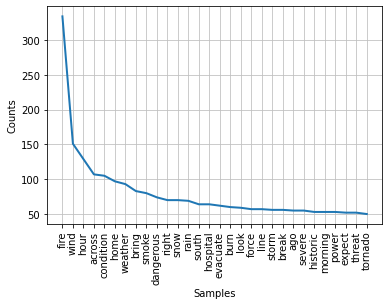

In [73]:
# graph frequence distributions of lemma words
lfdist = FreqDist(lemma_list)
print(fdist)

lfdist.plot(30,cumulative=False)
plt.show()

In [77]:
lfdist

FreqDist({'fire': 334, 'wind': 151, 'hour': 129, 'across': 107, 'condition': 105, 'home': 97, 'weather': 93, 'bring': 83, 'smoke': 80, 'dangerous': 74, ...})

In [79]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

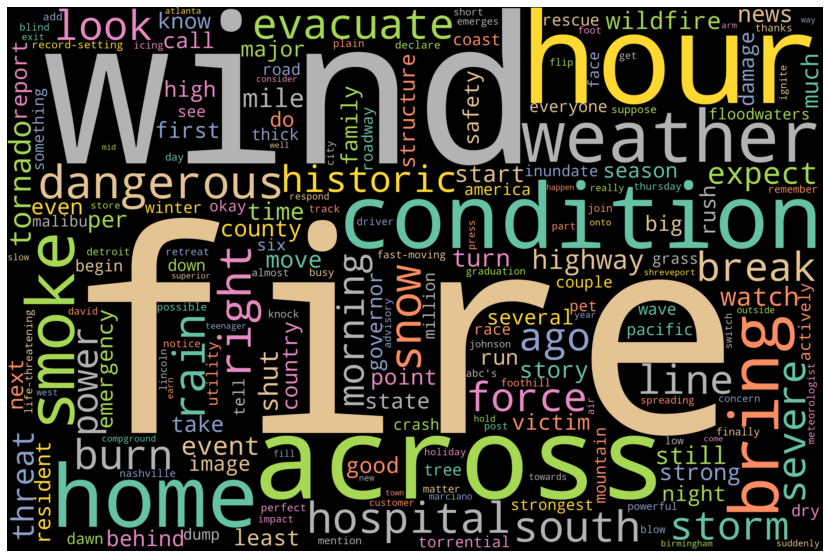

In [80]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords).generate_from_frequencies(lfdist)

# Plot
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

                     counts
Words                      
Climate-related         244
Non Climate-related    9338


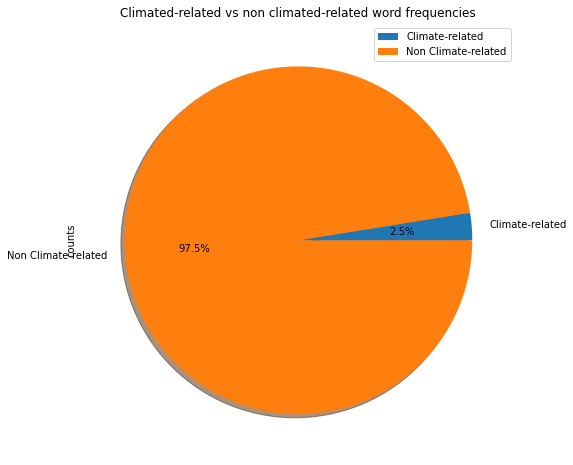

In [124]:
import pandas as pd
pd.options.display.max_rows = 500
words_df = pd.DataFrame(lfdist.items(), columns=['Word', 'Count'])

words_df.sort_values(by=['Count'], ascending=False, inplace=True)
len(words_df)
# 1374 total words

words_df['Count'].sum()
# 9582 counts total words


# create data
climate_words_count = climate_change_words_df['Count'].sum()
non_climate_words_count = words_df['Count'].sum() - climate_words_count

comparison_df = pd.DataFrame({'Words': ['Climate-related', 'Non Climate-related'],
                             'counts': [climate_words_count, non_climate_words_count]})
comparison_df.set_index('Words', inplace=True)
print(comparison_df)

plot = comparison_df.plot.pie(y='counts', title="Climated-related vs non climated-related word frequencies", legend=True, autopct='%1.1f%%', shadow=True, figsize=(8, 8))


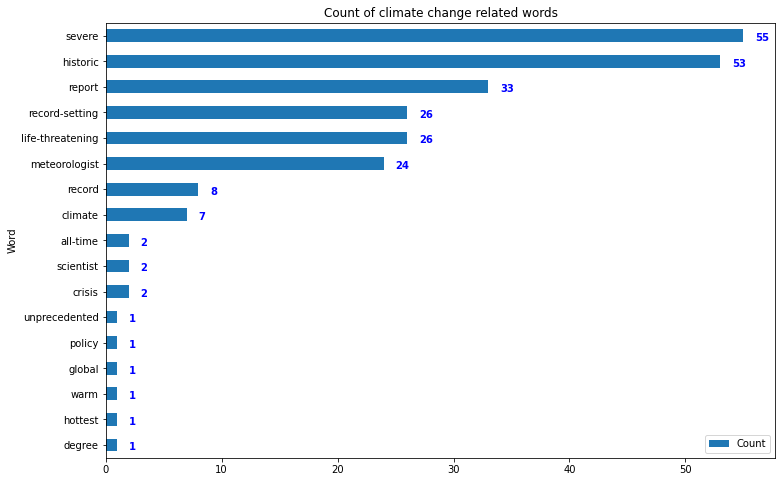

In [101]:
# find climate related word frequencies

climate_change_words_df = words_df.loc[words_df['Word'].isin(climate_change_related_words)]

# set figure size
fig, ax = plt.subplots(figsize=(12, 8))
# plot horizontal bar plot
climate_change_words_df.sort_values(by='Count').plot.barh(x="Word", y="Count", ax=ax)
# set the title
plt.title("Count of climate change related words")

for i, v in enumerate(climate_change_words_df['Count'].sort_values()):
    ax.text(v + 1, i - .2, str(v),
            color = 'blue', fontweight = 'bold')

plt.show()